In [2]:
# Uncomment the lines below to install the packages we need. 
# To make things look tidy again afterward, you can always recomment them, and then run the cell again - the packages will stay installed

#pip install jsonlines
#pip install seaborn

In [4]:
import requests                         # used to load data from the internet
import jsonlines                        # used to turn the huge glob of data from lab.js into a pandas dataframe
import pandas as pd                     # used to organize the data in columns and rows
import seaborn as sns                   # used to make pretty pictures :-)
from matplotlib import pyplot as plt    # used to touch up the figures that `seaborn`` makes

In [5]:
# This block of code is here to convert the data as it is saved on my server into a format we can use in python. 
# I copied this section from here: https://forum.cogsci.nl/discussion/8257/problem-with-jatos-result-conversion
# I think I would write it slightly differently, but hey, it works, and I didn't know how to do this before I found this post, so I'm not complaining
# The output from the OpenLab server where you will run your experiments is slightly different, so I don't think it is worth thinking about this too much.
# However, I have added comments to the code, so you can see what it does (and I can remember what it does!)

raw = '/Users/ethan/Documents/GitHub/ExPsyLing/Experiments/Experiment 1/data/data_2025/jatos_results_20250917125419.txt'

i = 0                                                          # set counter variable "i" to zero

with jsonlines.open(raw) as reader:                            # make a "reader" variable with the lab.js data (which is stored in "JSON" format)
    for line in reader:                                        # loop through every line in the lab.js JSON data
        if i == 0:                                             # check if i equals zero. If it does, then
            df = pd.DataFrame(line)                            # make a new pandas dataframe called "df" 
            i += 1                                             # add 1 to i
        else:                                                  # if i does not equal zero 
            df = pd.concat([df, pd.DataFrame(line)])           # get the next line of the json file, convert it to a dataframe, and stick it on the bottom of "df" 
            i += 1                                             # I don't think you actually  need this line. If it is running, then i already does not equal zero, so what's the point?

df['url'] = df['url'].ffill()                                  # fill in the column with the participant ID numbers
df['url'] = [int(x['srid']) for x in list(df['url'])]          # get the ID numbers out of the "dictionaries" and re-write the url column with the extracted ID numbers
df.rename(columns={'url': 'ID'}, inplace=True)                 # rename the url column as "ID"
del df['meta']                                                 # delete the "meta" column. I put this here just to show you how to delete a column

raw = df

To do:

1. make new dataframe called raw which is = df
2. only find rows where sender = "target"
3. get rid of rows where condition = "practice"


In [6]:
df = df[df['sender'] == 'target']
#df

In [7]:
df = df[df['condition'] != 'practice']
df

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
40,5930,target,canvas.Screen,12_0_0_0_4,response,669.54,26012.0,26010.84,26027.46,26697.0,...,response_natural,keypress(n),soil,SOIL,Con_Nat,short,congruent,n,n,False
46,5930,target,canvas.Screen,12_0_0_1_4,response,601.06,27378.0,27376.34,27392.94,27994.0,...,response_natural,keypress(n),worm,WORM,Con_Nat,short,congruent,n,n,False
52,5930,target,canvas.Screen,12_0_0_2_4,response,724.22,28676.0,28675.14,28691.78,29416.0,...,response_manmade,keypress(m),doll,DOLL,Con_Synth,short,congruent,m,m,False
58,5930,target,canvas.Screen,12_0_0_3_4,response,792.18,30108.0,30107.18,30123.82,30916.0,...,response_manmade,keypress(m),ladle,CAFÉ,Inc_Synth_Synth,short,incongruent,m,m,False
64,5930,target,canvas.Screen,12_0_0_4_4,response,1090.36,31608.0,31605.96,31622.64,32713.0,...,response_manmade,keypress(m),spade,SHELF,Inc_Synth_Synth,short,incongruent,m,m,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,5909,target,canvas.Screen,12_1_0_55_5,response,583.80,208068.6,208067.90,208084.50,208668.3,...,response_manmade,keypress(m),flask,FLASK,Con_Synth,long,congruent,m,m,False
796,5909,target,canvas.Screen,12_1_0_56_5,response,584.20,209434.8,209434.00,209450.50,210034.7,...,response_natural,keypress(n),bunny,ROSE,Inc_Nat_Nat,long,incongruent,m,m,False
803,5909,target,canvas.Screen,12_1_0_57_5,response,767.60,210801.3,210800.40,210817.00,211584.6,...,response_manmade,keypress(m),bell,WHEEL,Inc_Synth_Synth,long,incongruent,m,m,False
810,5909,target,canvas.Screen,12_1_0_58_5,response,1107.60,212350.7,212349.90,212366.30,213473.9,...,response_natural,keypress(n),shell,DIRT,Inc_Nat_Nat,long,incongruent,m,m,False


In [8]:
new_correct = []
for x in list(df['condition']):
    if x.endswith('Nat'):
        new_correct.append('keypress(n)')
    elif x.endswith('Synth'):
        new_correct.append('keypress(m)')
    else:
        print('oh no!!!!!')
df['correct_response'] = new_correct

In [9]:
df

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
40,5930,target,canvas.Screen,12_0_0_0_4,response,669.54,26012.0,26010.84,26027.46,26697.0,...,response_natural,keypress(n),soil,SOIL,Con_Nat,short,congruent,keypress(n),n,False
46,5930,target,canvas.Screen,12_0_0_1_4,response,601.06,27378.0,27376.34,27392.94,27994.0,...,response_natural,keypress(n),worm,WORM,Con_Nat,short,congruent,keypress(n),n,False
52,5930,target,canvas.Screen,12_0_0_2_4,response,724.22,28676.0,28675.14,28691.78,29416.0,...,response_manmade,keypress(m),doll,DOLL,Con_Synth,short,congruent,keypress(m),m,False
58,5930,target,canvas.Screen,12_0_0_3_4,response,792.18,30108.0,30107.18,30123.82,30916.0,...,response_manmade,keypress(m),ladle,CAFÉ,Inc_Synth_Synth,short,incongruent,keypress(m),m,False
64,5930,target,canvas.Screen,12_0_0_4_4,response,1090.36,31608.0,31605.96,31622.64,32713.0,...,response_manmade,keypress(m),spade,SHELF,Inc_Synth_Synth,short,incongruent,keypress(m),m,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,5909,target,canvas.Screen,12_1_0_55_5,response,583.80,208068.6,208067.90,208084.50,208668.3,...,response_manmade,keypress(m),flask,FLASK,Con_Synth,long,congruent,keypress(m),m,False
796,5909,target,canvas.Screen,12_1_0_56_5,response,584.20,209434.8,209434.00,209450.50,210034.7,...,response_natural,keypress(n),bunny,ROSE,Inc_Nat_Nat,long,incongruent,keypress(n),m,False
803,5909,target,canvas.Screen,12_1_0_57_5,response,767.60,210801.3,210800.40,210817.00,211584.6,...,response_manmade,keypress(m),bell,WHEEL,Inc_Synth_Synth,long,incongruent,keypress(m),m,False
810,5909,target,canvas.Screen,12_1_0_58_5,response,1107.60,212350.7,212349.90,212366.30,213473.9,...,response_natural,keypress(n),shell,DIRT,Inc_Nat_Nat,long,incongruent,keypress(n),m,False


In [10]:
list(df)

['ID',
 'sender',
 'sender_type',
 'sender_id',
 'ended_on',
 'duration',
 'time_run',
 'time_render',
 'time_show',
 'time_end',
 'time_commit',
 'timestamp',
 'time_switch',
 'response',
 'response_action',
 'prime',
 'target',
 'condition',
 'soa_condition',
 'congruence',
 'correct_response',
 'correctResponse',
 'correct']

In [11]:
cols = ['ID', 'duration', 'response_action','correct_response', 'prime', 'target', 'condition', 'soa_condition']
data = df[cols]
data

,ID,duration,response_action,correct_response,prime,target,condition,soa_condition
40,5930,669.54,keypress(n),keypress(n),soil,SOIL,Con_Nat,short
46,5930,601.06,keypress(n),keypress(n),worm,WORM,Con_Nat,short
52,5930,724.22,keypress(m),keypress(m),doll,DOLL,Con_Synth,short
58,5930,792.18,keypress(m),keypress(m),ladle,CAFÉ,Inc_Synth_Synth,short
64,5930,1090.36,keypress(m),keypress(m),spade,SHELF,Inc_Synth_Synth,short
...,...,...,...,...,...,...,...,...
789,5909,583.80,keypress(m),keypress(m),flask,FLASK,Con_Synth,long
796,5909,584.20,keypress(n),keypress(n),bunny,ROSE,Inc_Nat_Nat,long
803,5909,767.60,keypress(m),keypress(m),bell,WHEEL,Inc_Synth_Synth,long
810,5909,1107.60,keypress(n),keypress(n),shell,DIRT,Inc_Nat_Nat,long


In [12]:
data['correct'] = data['response_action'] == data['correct_response']

/var/folders/6m/mwt0c30539b1zrk5vf14dpr44pd98r/T/ipykernel_31109/3789727263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['correct'] = data['response_action'] == data['correct_response']


In [13]:
data

,ID,duration,response_action,correct_response,prime,target,condition,soa_condition,correct
40,5930,669.54,keypress(n),keypress(n),soil,SOIL,Con_Nat,short,True
46,5930,601.06,keypress(n),keypress(n),worm,WORM,Con_Nat,short,True
52,5930,724.22,keypress(m),keypress(m),doll,DOLL,Con_Synth,short,True
58,5930,792.18,keypress(m),keypress(m),ladle,CAFÉ,Inc_Synth_Synth,short,True
64,5930,1090.36,keypress(m),keypress(m),spade,SHELF,Inc_Synth_Synth,short,True
...,...,...,...,...,...,...,...,...,...
789,5909,583.80,keypress(m),keypress(m),flask,FLASK,Con_Synth,long,True
796,5909,584.20,keypress(n),keypress(n),bunny,ROSE,Inc_Nat_Nat,long,True
803,5909,767.60,keypress(m),keypress(m),bell,WHEEL,Inc_Synth_Synth,long,True
810,5909,1107.60,keypress(n),keypress(n),shell,DIRT,Inc_Nat_Nat,long,True


In [14]:
data.correct.unique()

array([ True, False])

In [15]:
data = data[data['correct'] == True]

In [16]:
data

,ID,duration,response_action,correct_response,prime,target,condition,soa_condition,correct
40,5930,669.54,keypress(n),keypress(n),soil,SOIL,Con_Nat,short,True
46,5930,601.06,keypress(n),keypress(n),worm,WORM,Con_Nat,short,True
52,5930,724.22,keypress(m),keypress(m),doll,DOLL,Con_Synth,short,True
58,5930,792.18,keypress(m),keypress(m),ladle,CAFÉ,Inc_Synth_Synth,short,True
64,5930,1090.36,keypress(m),keypress(m),spade,SHELF,Inc_Synth_Synth,short,True
...,...,...,...,...,...,...,...,...,...
789,5909,583.80,keypress(m),keypress(m),flask,FLASK,Con_Synth,long,True
796,5909,584.20,keypress(n),keypress(n),bunny,ROSE,Inc_Nat_Nat,long,True
803,5909,767.60,keypress(m),keypress(m),bell,WHEEL,Inc_Synth_Synth,long,True
810,5909,1107.60,keypress(n),keypress(n),shell,DIRT,Inc_Nat_Nat,long,True


Research questions:
1. Can we observe a (subliminal) priming effect?
2. If there is a priming effect, is this modulated by length of time between prime and target?

To-do's:
1. Add a column indexing whether or not the condition is "congruent" (prime is the same word as target)
2. Rename soa_condition "timing" or something similar
3. Find means for each participant for each congruency

In [17]:
data['congruency'] = ['Incongruent' if x.startswith('Inc') else 'Congruent' for x in list(data['condition'])]
data

/var/folders/6m/mwt0c30539b1zrk5vf14dpr44pd98r/T/ipykernel_31109/1951786409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['congruency'] = ['Incongruent' if x.startswith('Inc') else 'Congruent' for x in list(data['condition'])]


,ID,duration,response_action,correct_response,prime,target,condition,soa_condition,correct,congruency
40,5930,669.54,keypress(n),keypress(n),soil,SOIL,Con_Nat,short,True,Congruent
46,5930,601.06,keypress(n),keypress(n),worm,WORM,Con_Nat,short,True,Congruent
52,5930,724.22,keypress(m),keypress(m),doll,DOLL,Con_Synth,short,True,Congruent
58,5930,792.18,keypress(m),keypress(m),ladle,CAFÉ,Inc_Synth_Synth,short,True,Incongruent
64,5930,1090.36,keypress(m),keypress(m),spade,SHELF,Inc_Synth_Synth,short,True,Incongruent
...,...,...,...,...,...,...,...,...,...,...
789,5909,583.80,keypress(m),keypress(m),flask,FLASK,Con_Synth,long,True,Congruent
796,5909,584.20,keypress(n),keypress(n),bunny,ROSE,Inc_Nat_Nat,long,True,Incongruent
803,5909,767.60,keypress(m),keypress(m),bell,WHEEL,Inc_Synth_Synth,long,True,Incongruent
810,5909,1107.60,keypress(n),keypress(n),shell,DIRT,Inc_Nat_Nat,long,True,Incongruent


In [18]:
data = data.rename(columns={'soa_condition': 'timing'})
data

,ID,duration,response_action,correct_response,prime,target,condition,timing,correct,congruency
40,5930,669.54,keypress(n),keypress(n),soil,SOIL,Con_Nat,short,True,Congruent
46,5930,601.06,keypress(n),keypress(n),worm,WORM,Con_Nat,short,True,Congruent
52,5930,724.22,keypress(m),keypress(m),doll,DOLL,Con_Synth,short,True,Congruent
58,5930,792.18,keypress(m),keypress(m),ladle,CAFÉ,Inc_Synth_Synth,short,True,Incongruent
64,5930,1090.36,keypress(m),keypress(m),spade,SHELF,Inc_Synth_Synth,short,True,Incongruent
...,...,...,...,...,...,...,...,...,...,...
789,5909,583.80,keypress(m),keypress(m),flask,FLASK,Con_Synth,long,True,Congruent
796,5909,584.20,keypress(n),keypress(n),bunny,ROSE,Inc_Nat_Nat,long,True,Incongruent
803,5909,767.60,keypress(m),keypress(m),bell,WHEEL,Inc_Synth_Synth,long,True,Incongruent
810,5909,1107.60,keypress(n),keypress(n),shell,DIRT,Inc_Nat_Nat,long,True,Incongruent


In [19]:
data_agg = data.groupby(['ID', 'timing', 'congruency']).mean('duration').reset_index()
data_agg

,ID,timing,congruency,duration,correct
0,5909,long,Congruent,668.381481,1.0
1,5909,long,Incongruent,707.062963,1.0
2,5909,short,Congruent,636.307407,1.0
3,5909,short,Incongruent,716.472000,1.0
4,5911,long,Congruent,958.851852,1.0
...,...,...,...,...,...
67,5928,short,Incongruent,1183.685000,1.0
68,5930,long,Congruent,617.859310,1.0
69,5930,long,Incongruent,682.995333,1.0
70,5930,short,Congruent,692.080000,1.0


/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='congruency', ylabel='duration'>

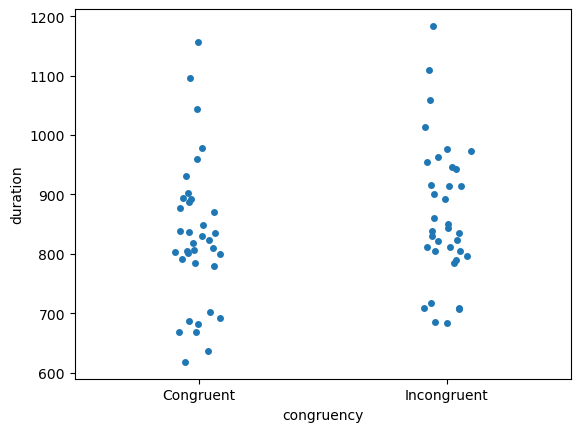

In [20]:
#sns.boxplot(data = data_agg, x = 'congruency', y = 'duration')
sns.stripplot(data = data_agg, x = 'congruency', y = 'duration')

/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='timing', ylabel='duration'>

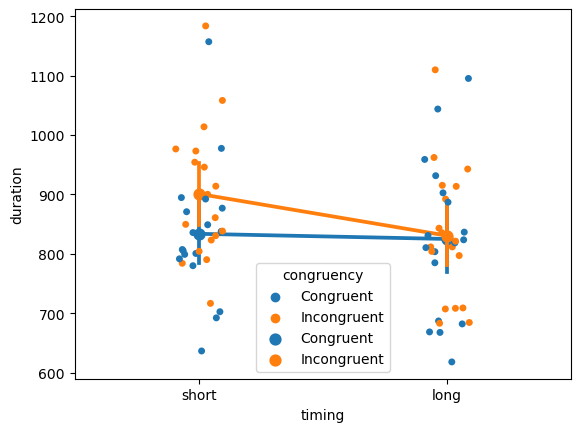

In [21]:
order = ['short', 'long'] 
sns.stripplot(data = data_agg, x = 'timing', y = 'duration', hue = 'congruency', order = order)
sns.pointplot(data = data_agg, x = 'timing', y = 'duration', hue = 'congruency', order = order)

/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='timing', ylabel='duration'>

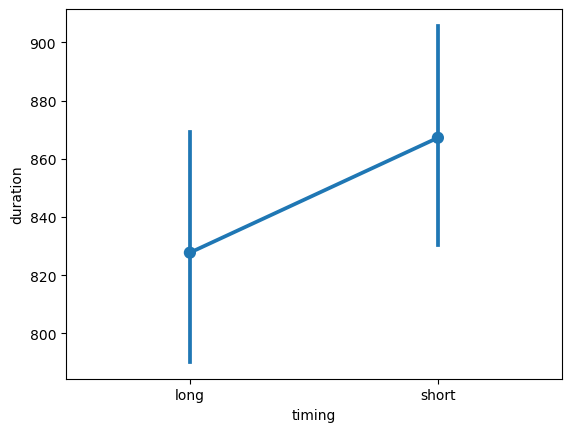

In [22]:
sns.pointplot(data=data_agg, x = 'timing', y = 'duration')

In [26]:
#%pip install pingouin
import pingouin as pg

In [27]:
pg.rm_anova(data=data, dv='duration', within=['congruency', 'timing'], subject='ID', correction='auto', detailed=False, effsize='ng2')

/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/ethan/opt/miniconda3/envs/p/lib/python3.11/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruency,23925.603970,1,17,23925.603970,15.728566,0.000998,0.000998,0.024477,1.0
1,timing,28073.819042,1,17,28073.819042,4.321923,0.053078,0.053078,0.028599,1.0
2,congruency * timing,17100.152226,1,17,17100.152226,14.966659,0.001233,0.001233,0.017617,1.0


In [34]:
import statsmodels

# model duration as a function of timing and congruency
import statsmodels.api as sm

# Convert categorical variables to dummy variables
X = pd.get_dummies(data_agg[['timing', 'congruency']], drop_first=True)
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Add interaction term between timing_short and congruency_Incongruent
X['timing_short_x_congruency_Incongruent'] = X['timing_short'] * X['congruency_Incongruent']

# Convert boolean columns to int
for col in X.select_dtypes(include='bool').columns:
	X[col] = X[col].astype(int)

y = data_agg['duration']

model = sm.OLS(y, X).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.643
Date:                Mon, 22 Sep 2025   Prob (F-statistic):              0.188
Time:                        15:21:54   Log-Likelihood:                -443.85
No. Observations:                  72   AIC:                             895.7
Df Residuals:                      68   BIC:                             904.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   824.9345     27.911     29.555      0.000     769.238     880.631
timing_short                              8.6703     39.473      0.220      0.827     -70.096      87.437
congruency_Incongruent                    5.6360     39.473      0.143      0.887     -73.131      84.402
timing_short_x_congruency_Incongruent    61.6444     55.823      1.104      0.273     -49.748     173.037
==============================================================================
Omnibus:                        5.946   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.204
Skew:                           0.629   Prob(JB):                       0.0741
Kurtosis:                       3.387   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""